<AxesSubplot:xlabel='Date'>

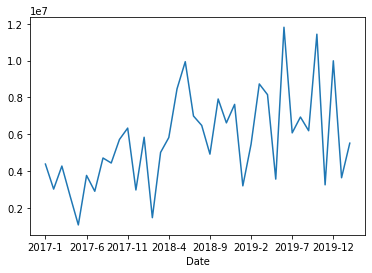

In [20]:
"""
ARIMA를 사용하여 코로나가 없었다면, 매출 예측
사용 데이터 : 2017.1 - 2020.2 (37개월)
예측 : 2020.3 - 2022.7 (28개월)
"""
import pandas as pd
revenue = pd.read_csv('../../resource/Model_Input/Monthly_net.csv', header=0, index_col=0, squeeze=True)
revenue_beforeCovid = pd.read_csv('../../resource/Model_Input/Monthly_Net_BeforeCorona.csv', header=0, index_col=0, squeeze=True)
revenue_beforeCovid.plot()

In [29]:
! pip install statsmodels
from statsmodels.tsa.arima_model import ARIMA

best_model = pmdarima.auto_arima(revenue_beforeCovid, exogenous=exog,                                    
                                 seasonal=True, stationary=False, 
                                 m=7, information_criterion='aic', 
                                 max_order=20,                                     
                                 max_p=10, max_d=3, max_q=10,                                     
                                 max_P=10, max_D=3, max_Q=10,                                   
                                 error_action='ignore')
print("best model --> (p, d, q):", best_model.order, " and  (P, D, 
      Q, s):", best_model.seasonal_order)

SyntaxError: EOL while scanning string literal (<ipython-input-29-000fb09c3728>, line 11)

In [10]:
# ! pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(revenue_beforeCovid, trace=True,
suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1200.712, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1223.611, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1202.348, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1201.071, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1221.627, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1199.382, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1204.239, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1198.314, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1199.524, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1202.814, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1197.893, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1199.410, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1200.391, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1199.186, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provi

                             ARIMA Model Results                              
Dep. Variable:                  D.Net   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -595.758
Method:                       css-mle   S.D. of innovations        2338592.672
Date:                Tue, 24 Aug 2021   AIC                           1199.517
Time:                        21:47:32   BIC                           1205.960
Sample:                    02-01-2017   HQIC                          1201.788
                         - 02-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.067e+04   3.19e+05      0.096      0.924   -5.95e+05    6.57e+05
ar.L1.D.Net    -0.2816      0.315     -0.894      0.371      -0.899       0.336
ma.L1.D.Net    -0.7521      0.569     -1.323    

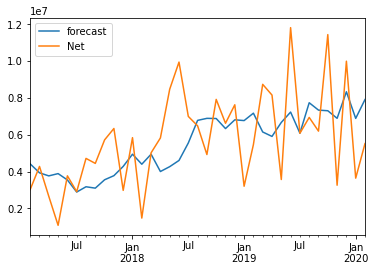

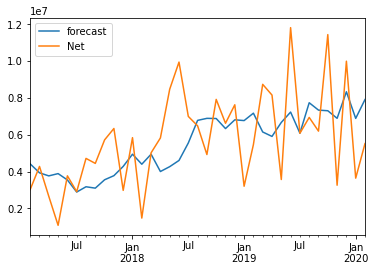

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(revenue_beforeCovid, order=(1,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

model_fit.plot_predict()

C:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

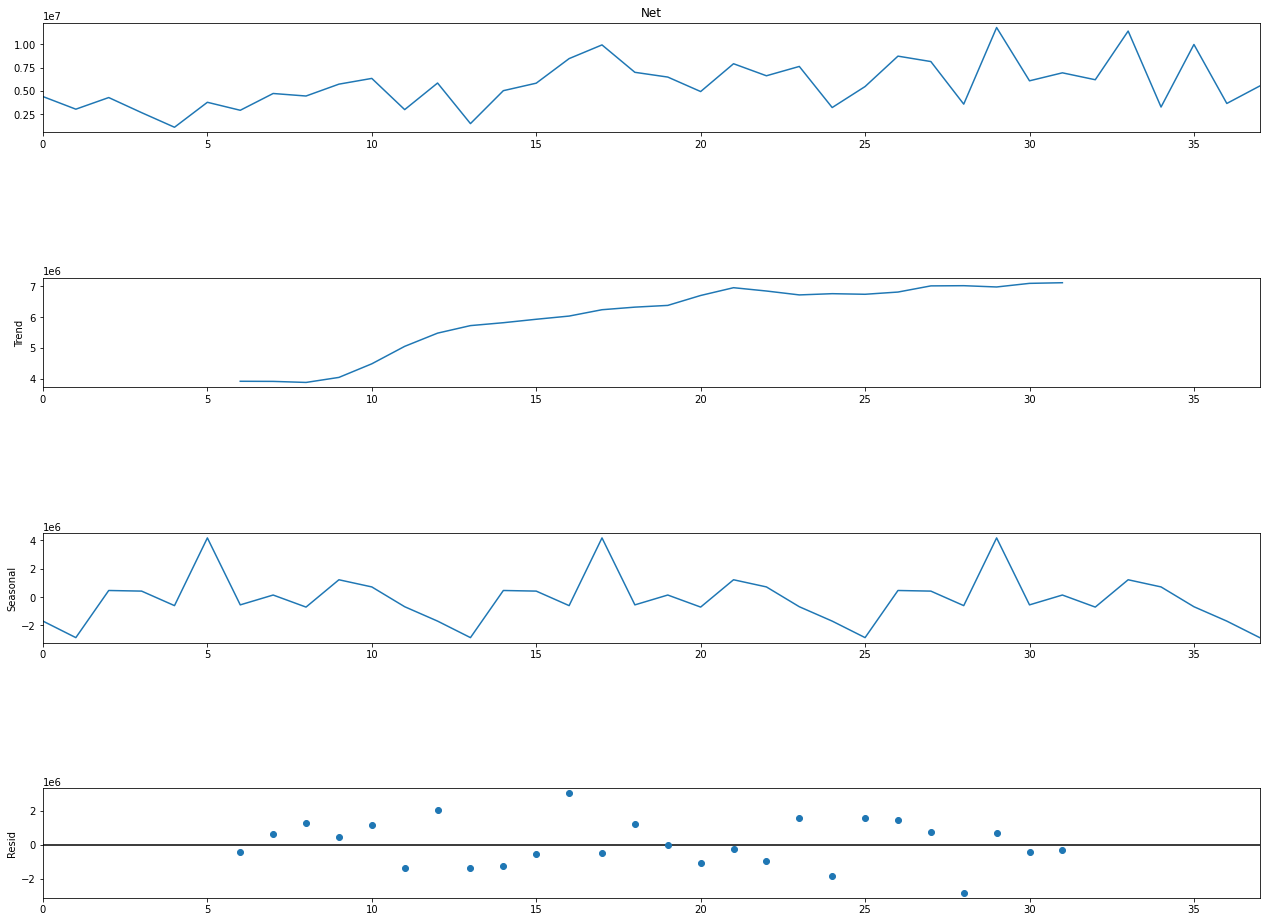

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(revenue_beforeCovid['Net'], model='additive',freq=12)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)